# Understanding behaviour on the internet

Let us assume we have a small website with 6 pages, we know the proportion of traffic from each page to any other page.

![](../img/site/main.png)

We can capture this mathematically using a matrix:

$$
M = 
\begin{pmatrix}
1 / 7 & 0     & 0     & 2 / 7 & 2 / 7 & 2 / 7 \\
1     & 0     & 0     & 0     & 0     & 0     \\
1/2   & 1 / 4 & 1 / 4 & 0     & 0     & 0     \\
0     & 1 / 4 & 1 / 2 & 1 / 4 & 0     & 0     \\
0     & 0     & 1 / 3 & 1 / 3 & 1 / 3 & 0     \\
0     & 0     & 0     & 1 / 3 & 1 / 3 & 1 / 3 \\
\end{pmatrix}
$$

We can use `numpy` to manipulate this matrix efficiently:

In [1]:
import numpy as np
M = np.array([[1 / 7, 0, 0, 2 / 7, 2 / 7, 2 / 7],
              [1, 0, 0, 0, 0, 0],
              [1 / 2, 1 / 4, 1 / 4, 0, 0, 0],
              [0, 1 / 4, 1 / 2, 1 / 4, 0, 0],
              [0, 0, 1 / 3, 1 / 3, 1 / 3, 0],
              [0, 0, 0, 1 / 3, 1 / 3, 1 / 3]])
M.round(2)

array([[ 0.14,  0.  ,  0.  ,  0.29,  0.29,  0.29],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.25,  0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.5 ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.33,  0.33,  0.33,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.33,  0.33,  0.33]])

### Exercises

- Define $\begin{pmatrix}0&1/2&1/2\\1/2&0&1/2\\0&1/2&1/2\end{pmatrix}$ as a `numpy` array.

# Probability after 2 clicks

We can investigate the probability of going from one page to another in 2 clicks by raising our matrix to a power:

$$M^2 = M \times M$$

Since python 3.6 we can use the `@` operator for matrix multiplication:

In [2]:
(M @ M).round(2)

array([[ 0.02,  0.07,  0.24,  0.3 ,  0.23,  0.14],
       [ 0.14,  0.  ,  0.  ,  0.29,  0.29,  0.29],
       [ 0.45,  0.06,  0.06,  0.14,  0.14,  0.14],
       [ 0.5 ,  0.19,  0.25,  0.06,  0.  ,  0.  ],
       [ 0.17,  0.17,  0.36,  0.19,  0.11,  0.  ],
       [ 0.  ,  0.08,  0.28,  0.31,  0.22,  0.11]])

We can also use `np.linalg.matrix_power`:

In [3]:
(np.linalg.matrix_power(M, 2)).round(2)

array([[ 0.02,  0.07,  0.24,  0.3 ,  0.23,  0.14],
       [ 0.14,  0.  ,  0.  ,  0.29,  0.29,  0.29],
       [ 0.45,  0.06,  0.06,  0.14,  0.14,  0.14],
       [ 0.5 ,  0.19,  0.25,  0.06,  0.  ,  0.  ],
       [ 0.17,  0.17,  0.36,  0.19,  0.11,  0.  ],
       [ 0.  ,  0.08,  0.28,  0.31,  0.22,  0.11]])

# Probability after many clicks


We can see what happens after a large number of clicks by raising $M$ to higher powers:

In [4]:
(np.linalg.matrix_power(M, 5)).round(2)

array([[ 0.28,  0.1 ,  0.18,  0.19,  0.15,  0.11],
       [ 0.31,  0.12,  0.22,  0.17,  0.12,  0.07],
       [ 0.24,  0.12,  0.24,  0.19,  0.13,  0.07],
       [ 0.16,  0.1 ,  0.23,  0.23,  0.17,  0.1 ],
       [ 0.21,  0.08,  0.18,  0.22,  0.18,  0.13],
       [ 0.27,  0.09,  0.17,  0.2 ,  0.16,  0.12]])

In [5]:
(np.linalg.matrix_power(M, 10)).round(2).round(2)

array([[ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ],
       [ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ],
       [ 0.24,  0.1 ,  0.21,  0.2 ,  0.15,  0.1 ],
       [ 0.23,  0.1 ,  0.21,  0.21,  0.15,  0.1 ],
       [ 0.23,  0.1 ,  0.2 ,  0.21,  0.15,  0.1 ],
       [ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ]])

In [6]:
(np.linalg.matrix_power(M, 50)).round(2).round(2)

array([[ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ],
       [ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ],
       [ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ],
       [ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ],
       [ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ],
       [ 0.24,  0.1 ,  0.2 ,  0.2 ,  0.15,  0.1 ]])

We see that after a large number of clicks we have a stabilised probability of arriving at any other page. This is referred to as the **steady state** of the Markov chain.

### Exercises

- Compute $\begin{pmatrix}0&1/2&1/2\\1/2&0&1/2\\0&1/2&1/2\end{pmatrix}^2$
- Compute $\begin{pmatrix}0&1/2&1/2\\1/2&0&1/2\\0&1/2&1/2\end{pmatrix}^{200}$

## Visualising the progress of the Markov chain

We can capture an initial state of the chain with a probability vector $\pi$. For example the following represents that we are in the first state (first page):

$$
\pi = (1, 0, 0, 0, 0, 0)
$$

then $\pi M$ gives us the probability of where we are in the next stage (after 1 click). Thus, $\pi M ^ k$ gives us the probability vector after $k$ clicks.

We can capture this in `numpy`:

In [7]:
pi = np.array([1, 0, 0, 0, 0, 0])
states = []
for k in range(20):
    pi = pi @ M
    states.append(pi)

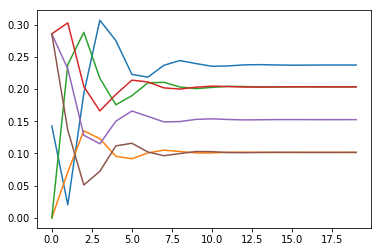

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(states);

We see that the Markov chain arrives at a steady state pretty quickly (about 10 clicks).


## Using eigenvalues to compute the probability directly

It is possible to directly find the steady state probaiblities by solving the following equation:

$$\pi M = \pi$$

This in fact corresponds to finding something called the unit eigenvector.

For a general matrix $M$ a **right** eigenvalue $\lambda$ and the corresponding eigenvector $v$ are solutions to the following equation:

$$M  v= \lambda v$$

a **left** eigenvalue $\lambda$ and the corresponding eigenvector $v$ are solutions to the following equation:

$$v M = \lambda v$$

Thus, our steady state probabilities correspond to the eigenvalue $1$ and can be done with `numpy`:

In [13]:
def obtain_steady_state(M):
    """
    Compute the steady state of a Markov chain
    """
    v, w = np.linalg.eig(M.transpose())  # This computes the left eigen-values/vectors of M
    return np.real(w[:, 0] / sum(w[:, 0]))

In [14]:
obtain_steady_state(M)

array([ 0.23728814,  0.10169492,  0.20338983,  0.20338983,  0.15254237,
        0.10169492])

We see that the first page is the one most likely to be visited followed by the 3rd and 4th.

### Exercises

- Compute the left eigen-values/vectors of $\begin{pmatrix}0&1/2&1/2\\1/2&0&1/2\\0&1/2&1/2\end{pmatrix}$
- Compute the right eigen-values/vectors of $\begin{pmatrix}0&1/2&1/2\\1/2&0&1/2\\0&1/2&1/2\end{pmatrix}$

## Increasing probability of going to a given page

We see that 10% of the time will be spent on the last page, let us see how we can increase that by considering the following matrix:

$$
M(x) = 
\begin{pmatrix}
1 / 7 & 0     & 0     & 2 / 7 - x / 2 & 2 / 7 - x / 2 & 2 / 7 + x \\
1     & 0     & 0     & 0     & 0     & 0     \\
1/2   & 1 / 4 & 1 / 4 & 0     & 0     & 0     \\
0     & 1 / 4 & 1 / 2 & 1 / 4 & 0     & 0     \\
0     & 0     & 1 / 3 & 1 / 3 & 1 / 3 & 0     \\
0     & 0     & 0     & 1 / 3 & 1 / 3 & 1 / 3 \\
\end{pmatrix}
$$

So this could correspond to an attempt to increase traffic from the first page to the last page.

In [15]:
def get_modified_chain(x, M=M):
    new_M = np.copy(M)
    new_M[0, -1] += x
    new_M[0, -2] -= x / 2
    new_M[0, -3] -= x / 2
    return new_M

In [16]:
get_modified_chain(0).round(2)

array([[ 0.14,  0.  ,  0.  ,  0.29,  0.29,  0.29],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.25,  0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.5 ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.33,  0.33,  0.33,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.33,  0.33,  0.33]])

In [17]:
get_modified_chain(.1).round(2)

array([[ 0.14,  0.  ,  0.  ,  0.24,  0.24,  0.39],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.25,  0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.5 ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.33,  0.33,  0.33,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.33,  0.33,  0.33]])

We can now see how changing this probability affect the chance of being on the last page:

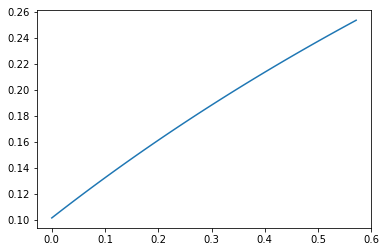

In [18]:
xs =  np.linspace(0, 4/7, 100) 
ys = [obtain_steady_state(get_modified_chain(x))[-1] for x in xs]
plt.plot(xs, ys);

We see that it's that the maximum value we can hope to achieve is 26%.

## Calculating expected sales

Let us assume that we know the average sales figures for each visit to a given page:

$$
s = (10, 2, 100, 84, 35, 50)
$$

we can compute the expected total sales using our probability vector.

In [19]:
s = np.array([10, 2, 100, 84, 35, 50])
sum(s * pi)

50.423348896884448

In [20]:
def expected_sales(x, M=M, s=s):
    return sum(s * obtain_steady_state(get_modified_chain(x, M=M)))

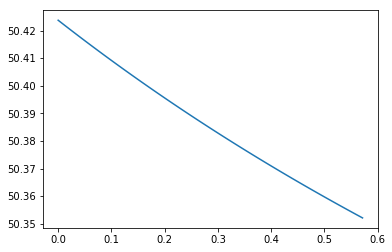

In [21]:
plt.plot(xs, [expected_sales(x) for x in xs]);

We see that rerouting our traffic would give us a very small loss in sales.